In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df=pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df['animal name'].unique().size

100

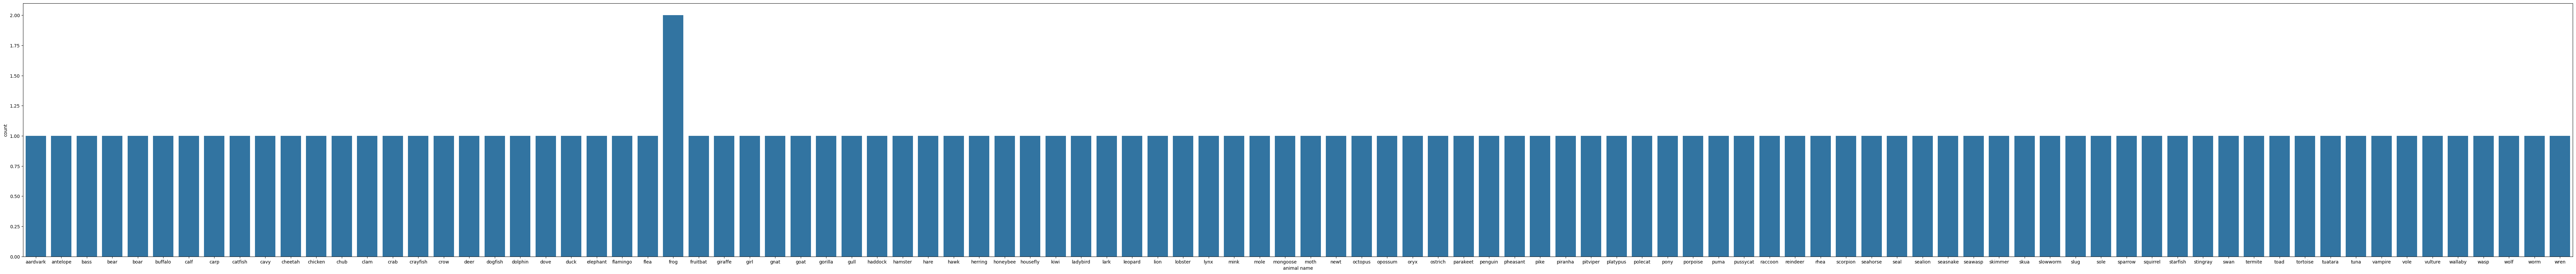

In [4]:
plt.figure(figsize=(100,10))

sns.countplot(x='animal name', data=df)
plt.show()

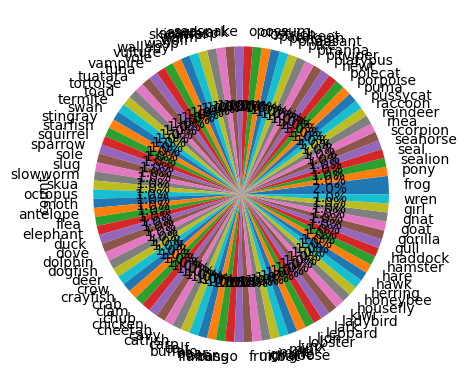

In [5]:
df['animal name'].value_counts().plot.pie(autopct='%2.1f%%')
plt.show()

In [6]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [23]:
df.head(20)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [26]:
x = df.drop(['animal name', 'type'], axis=1)
x


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
y = df['type']
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [31]:

# Print the shapes to confirm the split
print(x_train.shape, x_test.shape)

(80, 16) (21, 16)


In [34]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
        -0.7540739 , -1.07803625,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573, -0.46056619, -0.40115051,  0.59660054, -0.3992747 ,
        -0.83793058],
       [ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
        -0.7540739 , -1.07803625,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573, -0.46056619,  0.58629689,  0.59660054, -0.3992747 ,
         1.19341628],
       [-0.77459667, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
         1.32612997,  0.92761259,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573,  2.17124059, -1.38859791,  0.59660054, -0.3992747 ,
         1.19341628],
       [ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
        -0.7540739 ,  0.92761259,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573, -0.46056619,  0.58629689,  0.59660054, -0.3992747 ,
         1.19341628],
       [ 1.29099445, -0.53881591, -1

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)


In [37]:
knn.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [40]:
y_pred = knn.predict(x_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9523809523809523


In [43]:
clasiification=classification_report(y_test,y_pred)
print(clasiification)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
cmatrix=confusion_matrix(y_test,y_pred)
cmatrix

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]])

In [47]:
X_vis = df[['hair', 'feathers']]  # Replace 'hair' and 'feathers' with any two features from your dataset
y_vis = df['type']

In [48]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)


In [49]:
scaler = StandardScaler()
X_train_vis_scaled = scaler.fit_transform(X_train_vis)
X_test_vis_scaled = scaler.transform(X_test_vis)


In [50]:
# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vis_scaled, y_train_vis)


KNeighborsClassifier()

In [51]:
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))


In [52]:
# Predict the classification for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


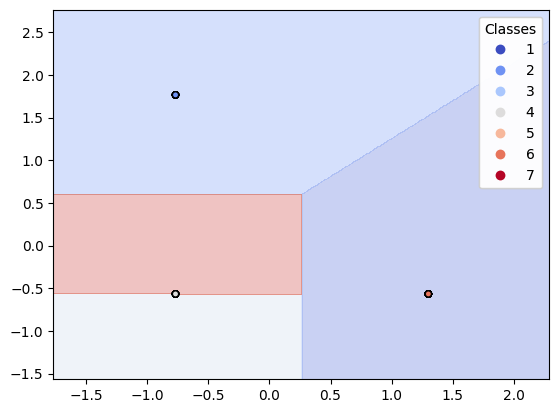

In [55]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot with labels for the legend
scatter = plt.scatter(X_train_vis_scaled[:, 0], X_train_vis_scaled[:, 1], c=y_train_vis, s=20, edgecolor='k', cmap=plt.cm.coolwarm)

# Adding labels for the legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)


**What are the key hyperparameters in KNN?**

ans. The key hyperparameters in k-NN include the number of neighbors (n_neighbors), the distance metric (metric), the weight function (weights), the algorithm used for neighbor search (algorithm), leaf size (leaf_size), and the power parameter (p) for the Minkowski distance. Tuning these hyperparameters is crucial for optimizing the model's performance on specific datasets.

 **What distance metrics can be used in KNN?**

 ans.in this knn euclidean  distance metrics can be used
 Euclidean Distance: The most common metric, defined as the straight-line distance between two points in Euclidean space. It is calculated as:

𝑑
(
𝑥
,
𝑦
)
=
rootover of
(
𝑥
𝑖
−
𝑦
𝑖
)^
2
